In [316]:
# pip install matplotlib

In [317]:
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Data Import

In [319]:
# ETF
etf = pd.read_csv('./etf_month_JY.csv')  # % 수익률
etf.columns = ['DATE', 'SPY', 'LQD', 'IEF']
# etf.set_index('DATE', inplace=True)

# Risk Free
rf = pd.read_csv('./rf_JY.csv')
# rf.set_index('DATE', inplace=True)

# Risk Premium
# credit01 = pd.read_csv('./credit01_JY.csv')
# credit02 = pd.read_csv('./credit02_JY.csv')
credit03 = pd.read_csv('./credit03_JY.csv')
# credit03.set_index('DATE', inplace=True)

# term01 = pd.read_csv('./term01_JY.csv')
# term02 = pd.read_csv('./term02_JY.csv')
term03 = pd.read_csv('./term03_JY.csv')
# term03.set_index('DATE', inplace=True)

equity01 = pd.read_csv('./equity01_JY.csv')
# equity01.set_index('DATE', inplace=True)
# equity02 = pd.read_csv('./equity02_JY.csv')

In [320]:
etf.iloc[:,1:] /= 100
etf  # 소수점 단위 완료

,DATE,SPY,LQD,IEF
0,2003-01,-0.055013,0.013695,0.008255
1,2003-02,-0.013479,0.019799,0.022040
2,2003-03,0.002140,0.001208,-0.003799
3,2003-04,0.084612,0.023578,0.001380
4,2003-05,0.054836,0.039052,0.037909
...,...,...,...,...
235,2022-08,-0.040802,-0.044291,-0.038538
236,2022-09,-0.092446,-0.059798,-0.047350
237,2022-10,0.081275,-0.007453,-0.014540
238,2022-11,0.055592,0.066477,0.036123


In [321]:
equity01.iloc[:,1] /= 12
equity01  # 연 수익률을 월 환산

,DATE,Return
0,2003-02,-0.020256
1,2003-03,0.005185
2,2003-04,0.077745
3,2003-05,0.047925
4,2003-06,0.008544
...,...,...
222,2021-08,0.027921
223,2021-09,-0.048715
224,2021-10,0.067825
225,2021-11,-0.009633


In [322]:
rf.iloc[:,1] /= 12
rf  # 연 수익률을 월 환산

,DATE,RF
0,2003-01,0.008333
1,2003-02,0.007500
2,2003-03,0.008333
3,2003-04,0.008333
4,2003-05,0.007500
...,...,...
221,2021-06,0.000000
222,2021-07,0.000000
223,2021-08,0.000000
224,2021-09,0.000000


In [323]:
# Regime : List
recovery = ['2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-07', '2010-08', '2010-09', '2010-10', '2011-06', '2011-12', '2012-01', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2015-10', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-11', '2016-12', '2017-01', '2017-02', '2019-02', '2019-03', '2019-04', '2019-06', '2019-09', '2019-10', '2019-11', '2019-12', '2020-11']
expansion = ['2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09', '2005-11', '2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2008-05', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2012-02', '2012-03', '2012-04', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-09', '2013-10', '2013-11', '2013-12', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-08', '2014-10', '2014-11', '2015-02', '2015-04', '2015-05', '2015-07', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-07', '2018-08', '2018-09', '2020-12', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10']
slowdown = ['2005-10', '2006-05', '2006-06', '2006-07', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-06', '2013-08', '2014-01', '2014-07', '2014-09', '2014-12', '2015-01', '2015-03', '2015-06', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-10', '2018-11', '2018-12', '2021-01', '2021-02']
contraction = ['2003-01', '2003-02', '2003-03', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2010-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2012-05', '2015-08', '2015-09', '2015-11', '2015-12', '2016-01', '2016-02', '2016-10', '2019-01', '2019-05', '2019-07', '2019-08', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10']

In [325]:
# Buy and Hold : List


start_date = '2003-01-01'
end_date = '2021-10-31'

bh = pd.date_range(start=start_date, end=end_date, freq='M').strftime('%Y-%m-%d').tolist()

In [326]:
bh

['2003-01-31',
 '2003-02-28',
 '2003-03-31',
 '2003-04-30',
 '2003-05-31',
 '2003-06-30',
 '2003-07-31',
 '2003-08-31',
 '2003-09-30',
 '2003-10-31',
 '2003-11-30',
 '2003-12-31',
 '2004-01-31',
 '2004-02-29',
 '2004-03-31',
 '2004-04-30',
 '2004-05-31',
 '2004-06-30',
 '2004-07-31',
 '2004-08-31',
 '2004-09-30',
 '2004-10-31',
 '2004-11-30',
 '2004-12-31',
 '2005-01-31',
 '2005-02-28',
 '2005-03-31',
 '2005-04-30',
 '2005-05-31',
 '2005-06-30',
 '2005-07-31',
 '2005-08-31',
 '2005-09-30',
 '2005-10-31',
 '2005-11-30',
 '2005-12-31',
 '2006-01-31',
 '2006-02-28',
 '2006-03-31',
 '2006-04-30',
 '2006-05-31',
 '2006-06-30',
 '2006-07-31',
 '2006-08-31',
 '2006-09-30',
 '2006-10-31',
 '2006-11-30',
 '2006-12-31',
 '2007-01-31',
 '2007-02-28',
 '2007-03-31',
 '2007-04-30',
 '2007-05-31',
 '2007-06-30',
 '2007-07-31',
 '2007-08-31',
 '2007-09-30',
 '2007-10-31',
 '2007-11-30',
 '2007-12-31',
 '2008-01-31',
 '2008-02-29',
 '2008-03-31',
 '2008-04-30',
 '2008-05-31',
 '2008-06-30',
 '2008-07-

### Recovery - SPY

In [327]:
# 데이터 병합
etf_month_spy = etf[['DATE', 'SPY']]
data01 = etf_month_spy.merge(rf, on='DATE', how='inner')
# data01 = data01.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data01 = data01.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data01 = data01.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data01 = data01.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data01 = data01.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data01 = data01.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data01 = data01.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data01 = data01.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data01.columns = ['DATE', 'SPY', 'rf', 'credit03', 'term03', 'equity01']
data01['DATE'] = pd.to_datetime(data01['DATE'])
data01['DATE'] = data01['DATE'].dt.strftime('%Y-%m')
data01.set_index('DATE', inplace=True)

# Assuming recovery_dates is a list of datetime objects representing the recovery dates
recovery_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in recovery] 
recovery_dates

# recovery 컬럼 추가
data01['recovery'] = data01.index.map(lambda x: 1 if x in recovery_dates else 0)
# data01['recovery'].unique()

# recovery 국면만 슬라이싱
data01 = data01[data01['recovery'] == 1]
data01

# Selecting relevant columns for the regression
X = data01[['rf', 'credit03', 'term03', 'equity01']]
y = data01['SPY']

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Performing the OLS regression
model01 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     7997.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           4.09e-67
Time:                        19:53:38   Log-Likelihood:                 275.37
No. Observations:                  53   AIC:                            -540.7
Df Residuals:                      48   BIC:                            -530.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.002     -0.352      0.726      -0.006       0.004
rf             0.1582      0.072      2.201      0.033       0.014       0.303
credit03       0.1325      0.122      1.085      0.284      -0.113       0.378
term03        -0.0421      0.122     -0.346      0.731      -0.286       0.202
equity01       1.0033      0.006    173.821      0.000       0.992       1.015
==============================================================================
Omnibus:                        0.523   Durbin-Watson:                   2.756
Prob(Omnibus):                  0.770   Jarque-Bera (JB):                0.172
Skew:                           0.129   Prob(JB):                        0.917
Kurtosis:                       3.107   Cond. No.                         927.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recovery - LQD

In [332]:
# 데이터 병합

etf_month_LQD = etf[['DATE', 'LQD']]
data02 = etf_month_LQD.merge(rf, on='DATE', how='inner')
# data02 = data02.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data02 = data02.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data02 = data02.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data02 = data02.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data02 = data02.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data02 = data02.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data02 = data02.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data02 = data02.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data02.columns = ['DATE', 'LQD', 'rf', 'credit03', 'term03', 'equity01']
data02['DATE'] = pd.to_datetime(data02['DATE'])
data02['DATE'] = data02['DATE'].dt.strftime('%Y-%m')
data02.set_index('DATE', inplace=True)

# Assuming recovery_dates is a list of datetime objects representing the recovery dates
recovery_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in recovery] 
recovery_dates

# recovery 컬럼 추가
data02['recovery'] = data02.index.map(lambda x: 1 if x in recovery_dates else 0)

# recovery 국면만 슬라이싱
data02 = data02[data02['recovery'] == 1]
data02

# Selecting relevant columns for the regression
X = data02[['rf', 'credit03', 'term03', 'equity01']]
y = data02['LQD']

# Adding a constant to the independent variables
# import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model02 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LQD   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.406
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.246
Time:                        19:53:38   Log-Likelihood:                 137.53
No. Observations:                  53   AIC:                            -265.1
Df Residuals:                      48   BIC:                            -255.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0353      0.032     -1.119      0.269      -0.099       0.028
rf             0.8458      0.969      0.873      0.387      -1.102       2.793
credit03       2.2893      1.647      1.390      0.171      -1.022       5.600
term03        -2.1932      1.637     -1.339      0.187      -5.485       1.099
equity01       0.1264      0.078      1.625      0.111      -0.030       0.283
==============================================================================
Omnibus:                       10.276   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.155
Skew:                          -0.717   Prob(JB):                      0.00229
Kurtosis:                       4.857   Cond. No.                         927.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recovery - IEF

In [333]:
# 데이터 병합
etf_month_IEF = etf[['DATE', 'IEF']]
data03 = etf_month_IEF.merge(rf, on='DATE', how='inner')
# data03 = data03.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data03 = data03.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data03 = data03.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data03 = data03.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data03 = data03.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data03 = data03.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data03 = data03.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data03 = data03.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data03.columns = ['DATE', 'IEF', 'rf', 'credit03', 'term03', 'equity01']
data03['DATE'] = pd.to_datetime(data03['DATE'])
data03['DATE'] = data03['DATE'].dt.strftime('%Y-%m')
data03.set_index('DATE', inplace=True)

# Assuming recovery_dates is a list of datetime objects representing the recovery dates
recovery_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in recovery] 
recovery_dates

# recovery 컬럼 추가
data03['recovery'] = data03.index.map(lambda x: 1 if x in recovery_dates else 0)

# recovery 국면만 슬라이싱
data03 = data03[data03['recovery'] == 1]
data03

# Selecting relevant columns for the regression
X = data03[['rf', 'credit03', 'term03','equity01']]
y = data03['IEF']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model03 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IEF   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.7398
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.570
Time:                        19:53:38   Log-Likelihood:                 139.21
No. Observations:                  53   AIC:                            -268.4
Df Residuals:                      48   BIC:                            -258.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0128      0.031     -0.418      0.678      -0.074       0.049
rf             0.6116      0.938      0.652      0.518      -1.275       2.498
credit03       0.7521      1.595      0.471      0.639      -2.455       3.959
term03        -0.5880      1.586     -0.371      0.712      -3.777       2.601
equity01      -0.1171      0.075     -1.554      0.127      -0.269       0.034
==============================================================================
Omnibus:                       10.218   Durbin-Watson:                   2.299
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.806
Skew:                          -0.728   Prob(JB):                      0.00273
Kurtosis:                       4.796   Cond. No.                         927.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Expansion - SPY

In [334]:
# 데이터 병합
etf_month_spy = etf[['DATE', 'SPY']]
data04 = etf_month_spy.merge(rf, on='DATE', how='inner')
# data04 = data04.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data04 = data04.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data04 = data04.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data04 = data04.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data04 = data04.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data04 = data04.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data04 = data04.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data04 = data04.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data04.columns = ['DATE', 'SPY', 'rf', 'credit03','term03', 'equity01']
data04['DATE'] = pd.to_datetime(data04['DATE'])
data04['DATE'] = data04['DATE'].dt.strftime('%Y-%m')
data04.set_index('DATE', inplace=True)

# Assuming expansion_dates is a list of datetime objects representing the expansion dates
expansion_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in expansion] 
expansion_dates

# expansion 컬럼 추가
data04['expansion'] = data04.index.map(lambda x: 1 if x in expansion_dates else 0)

# expansion 국면만 슬라이싱
data04 = data04[data04['expansion'] == 1]
data04

# Selecting relevant columns for the regression
X = data04[['rf', 'credit03','term03', 'equity01']]
y = data04['SPY']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model04 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3738.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.55e-97
Time:                        19:53:38   Log-Likelihood:                 466.37
No. Observations:                  93   AIC:                            -922.7
Df Residuals:                      88   BIC:                            -910.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.104      0.917      -0.003       0.003
rf             0.1599      0.032      5.013      0.000       0.097       0.223
credit03       0.0975      0.086      1.130      0.262      -0.074       0.269
term03        -0.0182      0.094     -0.194      0.847      -0.205       0.169
equity01       0.9982      0.008    120.059      0.000       0.982       1.015
==============================================================================
Omnibus:                       25.839   Durbin-Watson:                   2.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.380
Skew:                           0.917   Prob(JB):                     1.42e-15
Kurtosis:                       6.780   Cond. No.                         748.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Expansion - LQD

In [335]:
# 데이터 병합
etf_month_LQD = etf[['DATE', 'LQD']]
data05 = etf_month_LQD.merge(rf, on='DATE', how='inner')
# data05 = data05.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data05 = data05.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data05 = data05.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data05 = data05.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data05 = data05.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data05 = data05.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data05 = data05.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data05 = data05.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data05.columns = ['DATE', 'LQD', 'rf', 'credit03', 'term03', 'equity01']
data05['DATE'] = pd.to_datetime(data05['DATE'])
data05['DATE'] = data05['DATE'].dt.strftime('%Y-%m')
data05.set_index('DATE', inplace=True)

# Assuming expansion_dates is a list of datetime objects representing the expansion dates
expansion_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in expansion] 
expansion_dates

# expansion 컬럼 추가
data05['expansion'] = data05.index.map(lambda x: 1 if x in expansion_dates else 0)

# expansion 국면만 슬라이싱
data05 = data05[data05['expansion'] == 1]
data05

# Selecting relevant columns for the regression
X = data05[['rf', 'credit03', 'term03', 'equity01']]
y = data05['LQD']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model05 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LQD   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.4520
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.771
Time:                        19:53:38   Log-Likelihood:                 271.55
No. Observations:                  93   AIC:                            -533.1
Df Residuals:                      88   BIC:                            -520.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0098      0.012      0.828      0.410      -0.014       0.033
rf            -0.0651      0.259     -0.251      0.802      -0.580       0.450
credit03      -0.6768      0.701     -0.965      0.337      -2.070       0.716
term03         0.8023      0.764      1.050      0.296      -0.715       2.320
equity01       0.0601      0.068      0.889      0.376      -0.074       0.194
==============================================================================
Omnibus:                        6.411   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.992
Skew:                          -0.611   Prob(JB):                       0.0500
Kurtosis:                       3.226   Cond. No.                         748.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Expansion - IEF

In [336]:
# 데이터 병합
etf_month_IEF = etf[['DATE', 'IEF']]
data06 = etf_month_IEF.merge(rf, on='DATE', how='inner')
# data06 = data06.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data06 = data06.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data06 = data06.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data06 = data06.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data06 = data06.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data06 = data06.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data06 = data06.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data06 = data06.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data06.columns = ['DATE', 'IEF', 'rf', 'credit03', 'term03', 'equity01']
data06['DATE'] = pd.to_datetime(data06['DATE'])
data06['DATE'] = data06['DATE'].dt.strftime('%Y-%m')
data06.set_index('DATE', inplace=True)

# Assuming expansion_dates is a list of datetime objects representing the expansion dates
expansion_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in expansion] 
expansion_dates

# expansion 컬럼 추가
data06['expansion'] = data06.index.map(lambda x: 1 if x in expansion_dates else 0)

# expansion 국면만 슬라이싱
data06 = data06[data06['expansion'] == 1]
data06

# Selecting relevant columns for the regression
X = data06[['rf', 'credit03', 'term03', 'equity01']]
y = data06['IEF']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model06 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model06.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IEF   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5871
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.673
Time:                        19:53:38   Log-Likelihood:                 262.65
No. Observations:                  93   AIC:                            -515.3
Df Residuals:                      88   BIC:                            -502.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.013      0.233      0.816      -0.023       0.029
rf             0.0434      0.285      0.152      0.879      -0.523       0.610
credit03      -0.2431      0.771     -0.315      0.753      -1.776       1.290
term03         0.3571      0.840      0.425      0.672      -1.313       2.027
equity01      -0.0929      0.074     -1.251      0.214      -0.241       0.055
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.003
Skew:                          -0.557   Prob(JB):                       0.0820
Kurtosis:                       3.221   Cond. No.                         748.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Slowdown - SPY

In [337]:
# 데이터 병합
etf_month_spy = etf[['DATE', 'SPY']]
data07 = etf_month_spy.merge(rf, on='DATE', how='inner')
# data07 = data07.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data07 = data07.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data07 = data07.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data07 = data07.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data07 = data07.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data07 = data07.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data07 = data07.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data07 = data07.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data07.columns = ['DATE', 'SPY', 'rf', 'credit03', 'term03', 'equity01']
data07['DATE'] = pd.to_datetime(data07['DATE'])
data07['DATE'] = data07['DATE'].dt.strftime('%Y-%m')
data07.set_index('DATE', inplace=True)

# Assuming slowdown_dates is a list of datetime objects representing the slowdown dates
slowdown_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in slowdown] 
slowdown_dates

# slowdown 컬럼 추가
data07['slowdown'] = data07.index.map(lambda x: 1 if x in slowdown_dates else 0)

# slowdown 국면만 슬라이싱
data07 = data07[data07['slowdown'] == 1]
data07

# Selecting relevant columns for the regression
X = data07[['rf', 'credit03', 'term03', 'equity01']]
y = data07['SPY']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model07 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model07.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1908.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.78e-39
Time:                        19:53:39   Log-Likelihood:                 183.02
No. Observations:                  39   AIC:                            -356.0
Df Residuals:                      34   BIC:                            -347.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.002      0.956      0.346      -0.002       0.007
rf             0.0542      0.056      0.974      0.337      -0.059       0.167
credit03       0.1125      0.200      0.563      0.577      -0.294       0.519
term03        -0.1649      0.291     -0.567      0.574      -0.756       0.426
equity01       0.9845      0.012     85.533      0.000       0.961       1.008
==============================================================================
Omnibus:                        8.558   Durbin-Watson:                   2.455
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               16.936
Skew:                           0.157   Prob(JB):                     0.000210
Kurtosis:                       6.213   Cond. No.                         922.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Slowdown - LQD

In [338]:
# 데이터 병합
etf_month_LQD = etf[['DATE', 'LQD']]
data08 = etf_month_LQD.merge(rf, on='DATE', how='inner')
# data08 = data08.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data08 = data08.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data08 = data08.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data08 = data08.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data08 = data08.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data08 = data08.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data08 = data08.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data08 = data08.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data08.columns = ['DATE', 'LQD', 'rf', 'credit03', 'term03', 'equity01']
data08['DATE'] = pd.to_datetime(data08['DATE'])
data08['DATE'] = data08['DATE'].dt.strftime('%Y-%m')
data08.set_index('DATE', inplace=True)

# Assuming slowdown_dates is a list of datetime objects representing the slowdown dates
slowdown_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in slowdown] 
slowdown_dates

# slowdown 컬럼 추가
data08['slowdown'] = data08.index.map(lambda x: 1 if x in slowdown_dates else 0)

# slowdown 국면만 슬라이싱
data08 = data08[data08['slowdown'] == 1]
data08

# Selecting relevant columns for the regression
X = data08[['rf', 'credit03', 'term03', 'equity01']]
y = data08['LQD']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model08 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model08.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LQD   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1.733
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.165
Time:                        19:53:39   Log-Likelihood:                 113.13
No. Observations:                  39   AIC:                            -216.3
Df Residuals:                      34   BIC:                            -207.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0294      0.014     -2.146      0.039      -0.057      -0.002
rf             0.3144      0.334      0.942      0.353      -0.364       0.993
credit03       2.5684      1.199      2.141      0.039       0.131       5.006
term03        -3.3622      1.745     -1.927      0.062      -6.908       0.184
equity01      -0.0260      0.069     -0.377      0.709      -0.166       0.114
==============================================================================
Omnibus:                        4.178   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.213
Skew:                           0.694   Prob(JB):                        0.201
Kurtosis:                       3.219   Cond. No.                         922.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Slowdown - IEF

In [339]:
# 데이터 병합
etf_month_IEF = etf[['DATE', 'IEF']]
data09 = etf_month_IEF.merge(rf, on='DATE', how='inner')
# data09 = data09.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data09 = data09.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data09 = data09.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data09 = data09.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data09 = data09.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data09 = data09.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data09 = data09.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data09 = data09.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data09.columns = ['DATE', 'IEF', 'rf', 'credit03', 'term03', 'equity01']
data09['DATE'] = pd.to_datetime(data09['DATE'])
data09['DATE'] = data09['DATE'].dt.strftime('%Y-%m')
data09.set_index('DATE', inplace=True)

# Assuming slowdown_dates is a list of datetime objects representing the slowdown dates
slowdown_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in slowdown] 
slowdown_dates

# slowdown 컬럼 추가
data09['slowdown'] = data09.index.map(lambda x: 1 if x in slowdown_dates else 0)

# slowdown 국면만 슬라이싱
data09 = data09[data09['slowdown'] == 1]
data09

# Selecting relevant columns for the regression
X = data09[['rf', 'credit03', 'term03', 'equity01']]
y = data09['IEF']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model09 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model09.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IEF   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     4.794
Date:                Thu, 23 Nov 2023   Prob (F-statistic):            0.00356
Time:                        19:53:39   Log-Likelihood:                 112.28
No. Observations:                  39   AIC:                            -214.6
Df Residuals:                      34   BIC:                            -206.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0223      0.014     -1.589      0.121      -0.051       0.006
rf             0.2301      0.341      0.674      0.505      -0.463       0.924
credit03       2.5649      1.226      2.092      0.044       0.074       5.056
term03        -3.6553      1.783     -2.050      0.048      -7.280      -0.031
equity01      -0.2458      0.071     -3.481      0.001      -0.389      -0.102
==============================================================================
Omnibus:                        3.035   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                2.414
Skew:                           0.609   Prob(JB):                        0.299
Kurtosis:                       2.989   Cond. No.                         922.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Contraction - SPY

In [340]:
# 데이터 병합
etf_month_spy = etf[['DATE', 'SPY']]
data10 = etf_month_spy.merge(rf, on='DATE', how='inner')
# data10 = data10.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data10 = data10.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data10 = data10.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data10 = data10.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data10 = data10.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data10 = data10.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data10 = data10.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data10 = data10.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data10.columns = ['DATE', 'SPY', 'rf', 'credit03', 'term03', 'equity01']
data10['DATE'] = pd.to_datetime(data10['DATE'])
data10['DATE'] = data10['DATE'].dt.strftime('%Y-%m')
data10.set_index('DATE', inplace=True)

# Assuming contraction_dates is a list of datetime objects representing the contraction dates
contraction_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in contraction] 
contraction_dates

# contraction 컬럼 추가
data10['contraction'] = data10.index.map(lambda x: 1 if x in contraction_dates else 0)

# contraction 국면만 슬라이싱
data10 = data10[data10['contraction'] == 1]
data10

# Selecting relevant columns for the regression
X = data10[['rf', 'credit03', 'term03', 'equity01']]
y = data10['SPY']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model10 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7788.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           4.40e-51
Time:                        19:53:39   Log-Likelihood:                 189.01
No. Observations:                  40   AIC:                            -368.0
Df Residuals:                      35   BIC:                            -359.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.002      1.161      0.253      -0.002       0.008
rf             0.0163      0.077      0.212      0.834      -0.140       0.173
credit03      -0.0274      0.145     -0.189      0.851      -0.321       0.267
term03         0.0894      0.183      0.488      0.628      -0.282       0.461
equity01       0.9929      0.006    165.690      0.000       0.981       1.005
==============================================================================
Omnibus:                       10.028   Durbin-Watson:                   2.653
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.521
Skew:                          -0.834   Prob(JB):                      0.00519
Kurtosis:                       4.879   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Contraction - LQD

In [341]:
# 데이터 병합
etf_month_LQD = etf[['DATE', 'LQD']]
data11 = etf_month_LQD.merge(rf, on='DATE', how='inner')
# data11 = data11.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data11 = data11.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data11 = data11.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data11 = data11.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data11 = data11.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data11 = data11.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data11 = data11.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data11 = data11.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data11.columns = ['DATE', 'LQD', 'rf', 'credit03', 'term03', 'equity01']
data11['DATE'] = pd.to_datetime(data11['DATE'])
data11['DATE'] = data11['DATE'].dt.strftime('%Y-%m')
data11.set_index('DATE', inplace=True)

# Assuming contraction_dates is a list of datetime objects representing the contraction dates
contraction_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in contraction] 
contraction_dates

# contraction 컬럼 추가
data11['contraction'] = data11.index.map(lambda x: 1 if x in contraction_dates else 0)

# contraction 국면만 슬라이싱
data11 = data11[data11['contraction'] == 1]
data11

# Selecting relevant columns for the regression
X = data11[['rf', 'credit03', 'term03','equity01']]
y = data11['LQD']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model11 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LQD   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     2.507
Date:                Thu, 23 Nov 2023   Prob (F-statistic):             0.0596
Time:                        19:53:39   Log-Likelihood:                 81.502
No. Observations:                  40   AIC:                            -153.0
Df Residuals:                      35   BIC:                            -144.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0069      0.036     -0.194      0.848      -0.080       0.066
rf            -0.3057      1.133     -0.270      0.789      -2.605       1.994
credit03       1.3338      2.128      0.627      0.535      -2.987       5.655
term03        -1.7096      2.690     -0.635      0.529      -7.171       3.752
equity01       0.2508      0.088      2.847      0.007       0.072       0.430
==============================================================================
Omnibus:                       12.896   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.850
Skew:                           0.588   Prob(JB):                     5.44e-07
Kurtosis:                       6.991   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Contraction - IEF

In [342]:
# 데이터 병합
etf_month_IEF = etf[['DATE', 'IEF']]
data12 = etf_month_IEF.merge(rf, on='DATE', how='inner')
# data12 = data12.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data12 = data12.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data12 = data12.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data12 = data12.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data12 = data12.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data12 = data12.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data12 = data12.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data12 = data12.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data12.columns = ['DATE', 'IEF', 'rf', 'credit03', 'term03', 'equity01']
data12['DATE'] = pd.to_datetime(data12['DATE'])
data12['DATE'] = data12['DATE'].dt.strftime('%Y-%m')
data12.set_index('DATE', inplace=True)

# Assuming contraction_dates is a list of datetime objects representing the contraction dates
contraction_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in contraction] 
contraction_dates

# contraction 컬럼 추가
data12['contraction'] = data12.index.map(lambda x: 1 if x in contraction_dates else 0)

# contraction 국면만 슬라이싱
data12 = data12[data12['contraction'] == 1]
data12

# Selecting relevant columns for the regression
X = data12[['rf', 'credit03', 'term03', 'equity01']]
y = data12['IEF']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model12 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IEF   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.7842
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.543
Time:                        19:53:39   Log-Likelihood:                 96.106
No. Observations:                  40   AIC:                            -182.2
Df Residuals:                      35   BIC:                            -173.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0130      0.025     -0.523      0.604      -0.063       0.037
rf             0.8177      0.786      1.040      0.305      -0.778       2.414
credit03       1.3043      1.477      0.883      0.383      -1.695       4.303
term03        -1.5503      1.867     -0.830      0.412      -5.341       2.241
equity01      -0.0593      0.061     -0.970      0.339      -0.183       0.065
==============================================================================
Omnibus:                        1.188   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                0.393
Skew:                           0.037   Prob(JB):                        0.822
Kurtosis:                       3.480   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Buy and Hold - SPY

In [343]:
# 데이터 병합
etf_month_spy = etf[['DATE', 'SPY']]
data13 = etf_month_spy.merge(rf, on='DATE', how='inner')
# data13 = data13.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data13 = data13.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data13 = data13.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data13 = data13.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data13 = data13.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data13 = data13.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data13 = data13.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data13 = data13.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data13.columns = ['DATE', 'SPY', 'rf', 'credit03', 'term03', 'equity01']
data13['DATE'] = pd.to_datetime(data13['DATE'])
data13['DATE'] = data13['DATE'].dt.strftime('%Y-%m')
data13.set_index('DATE', inplace=True)

# Assuming bh_dates is a list of datetime objects representing the bh dates
bh_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in bh] 
bh_dates

# bh 컬럼 추가
data13['bh'] = data13.index.map(lambda x: 1 if x in bh_dates else 0)

# bh 국면만 슬라이싱
data13 = data13[data13['bh'] == 1]
data13

# Selecting relevant columns for the regression
X = data13[['rf', 'credit03', 'term03', 'equity01']]
y = data13['SPY']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model13 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.708e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          6.27e-295
Time:                        19:53:39   Log-Likelihood:                 1098.1
No. Observations:                 225   AIC:                            -2186.
Df Residuals:                     220   BIC:                            -2169.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.001      1.987      0.048    1.39e-05       0.003
rf             0.1094      0.020      5.462      0.000       0.070       0.149
credit03       0.0119      0.046      0.257      0.797      -0.079       0.103
term03         0.0644      0.052      1.246      0.214      -0.037       0.166
equity01       0.9976      0.003    320.810      0.000       0.991       1.004
==============================================================================
Omnibus:                       29.534   Durbin-Watson:                   2.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.409
Skew:                          -0.012   Prob(JB):                     1.49e-40
Kurtosis:                       7.423   Cond. No.                         561.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Buy and Hold - LQD

In [344]:
# 데이터 병합
etf_month_LQD = etf[['DATE', 'LQD']]
data14 = etf_month_LQD.merge(rf, on='DATE', how='inner')
# data14 = data14.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data14 = data14.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data14 = data14.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data14 = data14.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data14 = data14.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data14 = data14.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data14 = data14.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data14 = data14.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data14.columns = ['DATE', 'LQD', 'rf', 'credit03', 'term03', 'equity01']
data14['DATE'] = pd.to_datetime(data14['DATE'])
data14['DATE'] = data14['DATE'].dt.strftime('%Y-%m')
data14.set_index('DATE', inplace=True)

# Assuming bh_dates is a list of datetime objects representing the bh dates
bh_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in bh] 
bh_dates

# bh 컬럼 추가
data14['bh'] = data14.index.map(lambda x: 1 if x in bh_dates else 0)

# bh 국면만 슬라이싱
data14 = data14[data14['bh'] == 1]
data14

# Selecting relevant columns for the regression
X = data14[['rf', 'credit03', 'term03', 'equity01']]
y = data14['LQD']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model14 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LQD   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     7.143
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.00e-05
Time:                        19:53:39   Log-Likelihood:                 564.46
No. Observations:                 225   AIC:                            -1119.
Df Residuals:                     220   BIC:                            -1102.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0128      0.009     -1.421      0.157      -0.031       0.005
rf             0.2001      0.215      0.932      0.352      -0.223       0.623
credit03       1.0948      0.497      2.204      0.029       0.116       2.074
term03        -1.1912      0.554     -2.151      0.033      -2.283      -0.100
equity01       0.1686      0.033      5.058      0.000       0.103       0.234
==============================================================================
Omnibus:                       51.504   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.918
Skew:                           0.305   Prob(JB):                    2.34e-158
Kurtosis:                      11.778   Cond. No.                         561.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Buy and Hold - IEF

In [345]:
# 데이터 병합
etf_month_IEF = etf[['DATE', 'IEF']]
data15 = etf_month_IEF.merge(rf, on='DATE', how='inner')
# data15 = data15.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
# data15 = data15.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data15 = data15.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
# data15 = data15.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
# data15 = data15.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data15 = data15.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data15 = data15.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
# data15 = data15.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data15.columns = ['DATE', 'IEF', 'rf', 'credit03', 'term03', 'equity01']
data15['DATE'] = pd.to_datetime(data15['DATE'])
data15['DATE'] = data15['DATE'].dt.strftime('%Y-%m')
data15.set_index('DATE', inplace=True)

# Assuming bh_dates is a list of datetime objects representing the bh dates
bh_dates = [pd.to_datetime(date).strftime('%Y-%m') for date in bh] 
bh_dates

# bh 컬럼 추가
data15['bh'] = data15.index.map(lambda x: 1 if x in bh_dates else 0)

# bh 국면만 슬라이싱
data15 = data15[data15['bh'] == 1]
data15

# Selecting relevant columns for the regression
X = data15[['rf', 'credit03', 'term03', 'equity01']]
y = data15['IEF']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model15 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IEF   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     6.150
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           0.000104
Time:                        19:53:39   Log-Likelihood:                 596.60
No. Observations:                 225   AIC:                            -1183.
Df Residuals:                     220   BIC:                            -1166.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.008     -1.505      0.134      -0.027       0.004
rf             0.3052      0.186      1.640      0.102      -0.062       0.672
credit03       0.9886      0.431      2.296      0.023       0.140       1.837
term03        -1.0542      0.480     -2.196      0.029      -2.000      -0.108
equity01      -0.1091      0.029     -3.776      0.000      -0.166      -0.052
==============================================================================
Omnibus:                        7.696   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               10.385
Skew:                          -0.230   Prob(JB):                      0.00556
Kurtosis:                       3.947   Cond. No.                         561.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS result

In [346]:
co1 = model01.params
co2 = model02.params
co3 = model03.params
co4 = model04.params
co5 = model05.params
co6 = model06.params
co7 = model07.params
co8 = model08.params
co9 = model09.params
co10 = model10.params
co11 = model11.params
co12 = model12.params
co13 = model13.params
co14 = model14.params
co15 = model15.params

df1 = pd.DataFrame(co1, columns=['Coefficient'])
df2 = pd.DataFrame(co2, columns=['Coefficient'])
df3 = pd.DataFrame(co3, columns=['Coefficient'])
df4 = pd.DataFrame(co4, columns=['Coefficient'])
df5 = pd.DataFrame(co5, columns=['Coefficient'])
df6 = pd.DataFrame(co6, columns=['Coefficient'])
df7 = pd.DataFrame(co7, columns=['Coefficient'])
df8 = pd.DataFrame(co8, columns=['Coefficient'])
df9 = pd.DataFrame(co9, columns=['Coefficient'])
df10 = pd.DataFrame(co10, columns=['Coefficient'])
df11 = pd.DataFrame(co11, columns=['Coefficient'])
df12 = pd.DataFrame(co12, columns=['Coefficient'])
df13 = pd.DataFrame(co13, columns=['Coefficient'])
df14 = pd.DataFrame(co14, columns=['Coefficient'])
df15 = pd.DataFrame(co15, columns=['Coefficient'])

ols_result_coef = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=1)

ols_result_coef.columns = [['recovery-SPY', 'recovery-LQD', 'recovery-IEF','expansion-SPY', 'expansion-LQD', 'expansion-IEF', 
                            'slowdown-SPY', 'slowdown-LQD', 'slowdown-IEF', 'contraction-SPY', 'contraction-LQD', 'contraction-IEF',
                            'buy_and_hold-SPY', 'buy_and_hold-LQD', 'buy_and_hold-IEF']]

In [347]:
ols_result_coef

,recovery-SPY,recovery-LQD,recovery-IEF,expansion-SPY,expansion-LQD,expansion-IEF,slowdown-SPY,slowdown-LQD,slowdown-IEF,contraction-SPY,contraction-LQD,contraction-IEF,buy_and_hold-SPY,buy_and_hold-LQD,buy_and_hold-IEF
const,-0.000824,-0.035306,-0.012762,0.000151,0.009752,0.003020,0.002183,-0.029421,-0.022276,0.002829,-0.006928,-0.012995,0.001672,-0.012815,-0.011762
rf,0.158221,0.845820,0.611639,0.159919,-0.065123,0.043420,0.054177,0.314369,0.230060,0.016318,-0.305718,0.817716,0.109375,0.200097,0.305182
credit03,0.132530,2.289321,0.752060,0.097491,-0.676775,-0.243093,0.112503,2.568359,2.564892,-0.027378,1.333823,1.304321,0.011919,1.094847,0.988564
term03,-0.042066,-2.193156,-0.588018,-0.018223,0.802258,0.357060,-0.164888,-3.362175,-3.655332,0.089405,-1.709574,-1.550281,0.064353,-1.191235,-1.054199
equity01,1.003331,0.126395,-0.117118,0.998162,0.060067,-0.092948,0.984478,-0.026022,-0.245762,0.992868,0.250776,-0.059292,0.997595,0.168568,-0.109106


### 시각화 (Panel A)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (5,).

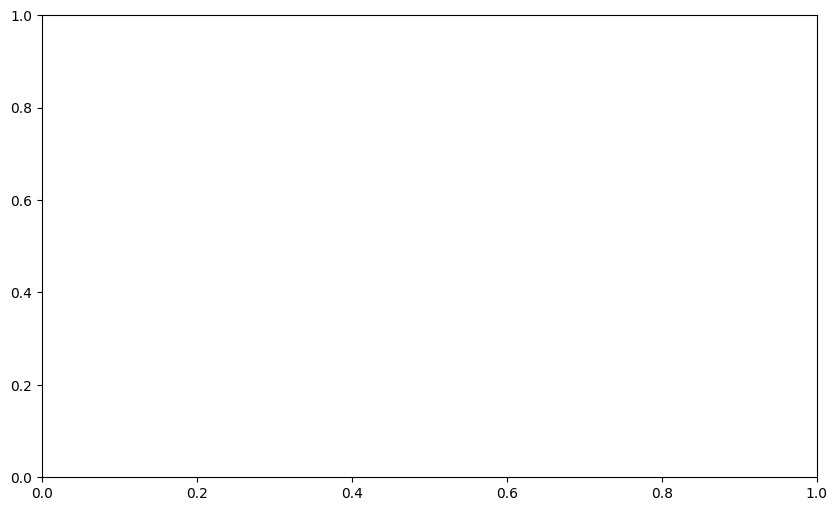

In [375]:
data = {
    'Recovery': [5, 3, 2, 4, 6],  # 회복 국면에서의 수익률(베타계수)
    'Expansion': [7, 5, 3, 6, 8],  # 확장 국면에서의 수익률(베타계수)
    'Slowdown': [-2, -1, 0, -1, -2],  # 둔화 국면에서의 수익률(베타계수)
    'Contraction': [-4, -3, -2, -3, -4],  # 수축 국면에서의 수익률(베타계수)
    'Buy & Hold': [4, 3, 5, 4, 5]  # 매수 및 보유 국면에서의 수익률(베타계수)
}
asset_classes = ['SPY', 'LQD', 'IEF']
phases = list(data.keys())

# 데이터를 기반으로 그래프를 그립니다.
n = len(asset_classes)
r = np.arange(n)
width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))

for i, phase in enumerate(phases):
    ax.bar(r + i*width, data[phase], width=width, label=phase)

# 축 이름과 제목을 추가합니다.
ax.set_xlabel('Asset Class')
ax.set_ylabel('Performance (%)')
ax.set_title('Risk Premia Mapping and Conditional Performance')
ax.set_xticks(r + width * (len(phases) - 1) / 2)
ax.set_xticklabels(asset_classes)
ax.legend()

# 그래프를 표시합니다.
plt.show()

In [349]:
ols_result_coef.to_csv('./ols_result_coef.csv')

In [350]:
ols_result_coef

,recovery-SPY,recovery-LQD,recovery-IEF,expansion-SPY,expansion-LQD,expansion-IEF,slowdown-SPY,slowdown-LQD,slowdown-IEF,contraction-SPY,contraction-LQD,contraction-IEF,buy_and_hold-SPY,buy_and_hold-LQD,buy_and_hold-IEF
const,-0.000824,-0.035306,-0.012762,0.000151,0.009752,0.003020,0.002183,-0.029421,-0.022276,0.002829,-0.006928,-0.012995,0.001672,-0.012815,-0.011762
rf,0.158221,0.845820,0.611639,0.159919,-0.065123,0.043420,0.054177,0.314369,0.230060,0.016318,-0.305718,0.817716,0.109375,0.200097,0.305182
credit03,0.132530,2.289321,0.752060,0.097491,-0.676775,-0.243093,0.112503,2.568359,2.564892,-0.027378,1.333823,1.304321,0.011919,1.094847,0.988564
term03,-0.042066,-2.193156,-0.588018,-0.018223,0.802258,0.357060,-0.164888,-3.362175,-3.655332,0.089405,-1.709574,-1.550281,0.064353,-1.191235,-1.054199
equity01,1.003331,0.126395,-0.117118,0.998162,0.060067,-0.092948,0.984478,-0.026022,-0.245762,0.992868,0.250776,-0.059292,0.997595,0.168568,-0.109106


In [353]:
data01   # 소수점, 소수점, 소수점, 소수점, 소수점

,SPY,rf,credit03,term03,equity01,recovery
DATE,,,,,,
2003-04,0.084612,0.008333,0.046226,0.028062,0.077745,1
2003-05,0.054836,0.007500,0.041659,0.024810,0.047925,1
2003-06,0.010652,0.008333,0.040213,0.023981,0.008544,1
2003-07,0.018028,0.005833,0.044720,0.030550,0.012911,1
2003-08,0.020626,0.005833,0.049030,0.034762,0.014169,1
2003-09,-0.010906,0.006667,0.047923,0.033190,-0.015506,1
2009-05,0.058453,0.000000,0.053550,0.031160,0.050337,1
2009-06,-0.000655,0.000833,0.054514,0.035432,-0.002906,1
2009-07,0.074606,0.000833,0.052244,0.033786,0.071173,1


In [354]:
def anuual_ret(df):
    etf = (((df.iloc[:,0]).mean() + 1) ** 12) - 1  # etf 연 평균 수익률 -> 소수점 단위 변경
    rf = (((df.iloc[:,1]).mean() + 1) ** 12) - 1  # rf
    credit = (((df.iloc[:,2] ).mean() + 1) ** 12) - 1  # credit
    term = (((df.iloc[:,3] ).mean() + 1) ** 12) - 1  # term
    equity = (((df.iloc[:,4]).mean() + 1) ** 12) - 1  # equity
    lst = [etf, rf, credit, term, equity] 
    return lst  # 소수점 단위 값

In [355]:
print(anuual_ret(data01))  # Recovery-SPY
print(anuual_ret(data02))  # Recovery-LQD
print(anuual_ret(data03))  # Recovery-IEF
print(anuual_ret(data04))  # Expansion-SPY
print(anuual_ret(data05))  # Expansion-LQD
print(anuual_ret(data06))  # Expansion-IEF
print(anuual_ret(data07))  # Slowdown-SPY
print(anuual_ret(data08))  # Slowdown-LQD
print(anuual_ret(data09))  # Slowdown-IEF
print(anuual_ret(data10))  # Contraction-SPY
print(anuual_ret(data11))  # Contraction-LQD
print(anuual_ret(data12))  # Contraction-IEF
print(anuual_ret(data13))  # Buy and Hold-SPY
print(anuual_ret(data14))  # Buy and Hold-LQD
print(anuual_ret(data15))  # Buy and Hold-IEF

# [etf, rf, credit, term, equity] 

[0.37414406082046403, 0.04387728810760838, 0.5526015855214659, 0.2783404470330859, 0.3128247504815327]
[0.13717106029724357, 0.04387728810760838, 0.5526015855214659, 0.2783404470330859, 0.3128247504815327]
[0.03251828254735356, 0.04387728810760838, 0.5526015855214659, 0.2783404470330859, 0.3128247504815327]
[0.2568038295684021, 0.1061275526111558, 0.45921707067582074, 0.24028182314712532, 0.19515971659839715]
[0.03630537551104207, 0.1061275526111558, 0.45921707067582074, 0.24028182314712532, 0.19515971659839715]
[0.00823353344066624, 0.1061275526111558, 0.45921707067582074, 0.24028182314712532, 0.19515971659839715]
[-0.1142479464820898, 0.22031402112683618, 0.3163496745460763, 0.13898270093323362, -0.157471108519198]
[-0.011271583358141046, 0.22031402112683618, 0.3163496745460763, 0.13898270093323362, -0.157471108519198]
[0.05697612463079982, 0.22031402112683618, 0.3163496745460763, 0.13898270093323362, -0.157471108519198]
[-0.16107945133609558, 0.0529952622332055, 0.5140582159234852, 

In [365]:
ret01 = anuual_ret(data01)  # Recovery-SPY
ret02 = anuual_ret(data02)  # Recovery-LQD
ret03 = anuual_ret(data03)  # Recovery-IEF
ret04 = anuual_ret(data04)  # Expansion-SPY
ret05 = anuual_ret(data05)  # Expansion-LQD
ret06 = anuual_ret(data06)  # Expansion-IEF
ret07 = anuual_ret(data07)  # Slowdown-SPY
ret08 = anuual_ret(data08)  # Slowdown-LQD
ret09 = anuual_ret(data09)  # Slowdown-IEF
ret10 = anuual_ret(data10)  # Contraction-SPY
ret11 = anuual_ret(data11)  # Contraction-LQD
ret12 = anuual_ret(data12)  # Contraction-IEF
ret13 = anuual_ret(data13)  # Buy and Hold-SPY
ret14 = anuual_ret(data14)  # Buy and Hold-LQD
ret15 = anuual_ret(data15)  # Buy and Hold-IEF

In [366]:
ols_result_coef

,recovery-SPY,recovery-LQD,recovery-IEF,expansion-SPY,expansion-LQD,expansion-IEF,slowdown-SPY,slowdown-LQD,slowdown-IEF,contraction-SPY,contraction-LQD,contraction-IEF,buy_and_hold-SPY,buy_and_hold-LQD,buy_and_hold-IEF
const,-0.000824,-0.035306,-0.012762,0.000151,0.009752,0.003020,0.002183,-0.029421,-0.022276,0.002829,-0.006928,-0.012995,0.001672,-0.012815,-0.011762
rf,0.158221,0.845820,0.611639,0.159919,-0.065123,0.043420,0.054177,0.314369,0.230060,0.016318,-0.305718,0.817716,0.109375,0.200097,0.305182
credit03,0.132530,2.289321,0.752060,0.097491,-0.676775,-0.243093,0.112503,2.568359,2.564892,-0.027378,1.333823,1.304321,0.011919,1.094847,0.988564
term03,-0.042066,-2.193156,-0.588018,-0.018223,0.802258,0.357060,-0.164888,-3.362175,-3.655332,0.089405,-1.709574,-1.550281,0.064353,-1.191235,-1.054199
equity01,1.003331,0.126395,-0.117118,0.998162,0.060067,-0.092948,0.984478,-0.026022,-0.245762,0.992868,0.250776,-0.059292,0.997595,0.168568,-0.109106


In [372]:
# y(SPY) 
re_SPY = ols_result_coef.loc['rf', 'recovery-SPY']      * ret01[1] + ols_result_coef.loc['credit03','recovery-SPY']      * ret01[2] + ols_result_coef.loc['term03', 'recovery-SPY']     * ret01[3] + ols_result_coef.loc['equity01', 'recovery-SPY']     * ret01[4]
ex_SPY = ols_result_coef.loc['rf', 'expansion-SPY']     * ret04[1] + ols_result_coef.loc['credit03','expansion-SPY']     * ret04[2] + ols_result_coef.loc['term03', 'expansion-SPY']    * ret04[3] + ols_result_coef.loc['equity01', 'expansion-SPY']    * ret04[4]
sl_SPY = ols_result_coef.loc['rf', 'slowdown-SPY']      * ret07[1] + ols_result_coef.loc['credit03','slowdown-SPY']      * ret07[2] + ols_result_coef.loc['term03', 'slowdown-SPY']     * ret07[3] + ols_result_coef.loc['equity01', 'slowdown-SPY']     * ret07[4]
con_SPY = ols_result_coef.loc['rf', 'contraction-SPY']  * ret10[1] + ols_result_coef.loc['credit03','contraction-SPY']   * ret10[2] + ols_result_coef.loc['term03', 'contraction-SPY']  * ret10[3] + ols_result_coef.loc['equity01', 'contraction-SPY']  * ret10[4]
bh_SPY = ols_result_coef.loc['rf', 'buy_and_hold-SPY']  * ret13[1] + ols_result_coef.loc['credit03','buy_and_hold-SPY']  * ret13[2] + ols_result_coef.loc['term03', 'buy_and_hold-SPY'] * ret13[3] + ols_result_coef.loc['equity01', 'buy_and_hold-SPY'] * ret13[4]

In [373]:
# y(LQD) 
re_LQD =  ols_result_coef.loc['rf', 'recovery-LQD']        * ret02[1] + ols_result_coef.loc['credit03','recovery-LQD']     * ret02[2] + ols_result_coef.loc['term03', 'recovery-LQD']     * ret02[3] + ols_result_coef.loc['equity01', 'recovery-LQD']     * ret02[4]
ex_LQD =  ols_result_coef.loc['rf', 'expansion-LQD']       * ret05[1] + ols_result_coef.loc['credit03','expansion-LQD']    * ret05[2] + ols_result_coef.loc['term03', 'expansion-LQD']    * ret05[3] + ols_result_coef.loc['equity01', 'expansion-LQD']    * ret05[4]
sl_LQD =  ols_result_coef.loc['rf', 'slowdown-LQD']        * ret08[1] + ols_result_coef.loc['credit03','slowdown-LQD']     * ret08[2] + ols_result_coef.loc['term03', 'slowdown-LQD']     * ret08[3] + ols_result_coef.loc['equity01', 'slowdown-LQD']     * ret08[4]
con_LQD = ols_result_coef.loc['rf', 'contraction-LQD']     * ret11[1] + ols_result_coef.loc['credit03','contraction-LQD']  * ret11[2] + ols_result_coef.loc['term03', 'contraction-LQD']  * ret11[3] + ols_result_coef.loc['equity01', 'contraction-LQD']  * ret11[4]
bh_LQD =  ols_result_coef.loc['rf', 'buy_and_hold-LQD']    * ret14[1] + ols_result_coef.loc['credit03','buy_and_hold-LQD'] * ret14[2] + ols_result_coef.loc['term03', 'buy_and_hold-LQD'] * ret14[3] + ols_result_coef.loc['equity01', 'buy_and_hold-LQD'] * ret14[4]

In [374]:
# y(IEF) 
re_IEF = ols_result_coef.loc['rf', 'recovery-IEF']        * ret03[1] + ols_result_coef.loc['credit03','recovery-IEF']     * ret03[2] + ols_result_coef.loc['term03', 'recovery-IEF']     * ret03[3] + ols_result_coef.loc['equity01', 'recovery-IEF']     * ret03[4]
ex_IEF = ols_result_coef.loc['rf', 'recovery-IEF']        * ret06[1] + ols_result_coef.loc['credit03','expansion-IEF']    * ret06[2] + ols_result_coef.loc['term03', 'expansion-IEF']    * ret06[3] + ols_result_coef.loc['equity01', 'expansion-IEF']    * ret06[4]
sl_IEF = ols_result_coef.loc['rf', 'recovery-IEF']        * ret09[1] + ols_result_coef.loc['credit03','slowdown-IEF']     * ret09[2] + ols_result_coef.loc['term03', 'slowdown-IEF']     * ret09[3] + ols_result_coef.loc['equity01', 'slowdown-IEF']     * ret09[4]
con_IEF = ols_result_coef.loc['rf', 'recovery-IEF']       * ret12[1] + ols_result_coef.loc['credit03','contraction-IEF']  * ret12[2] + ols_result_coef.loc['term03', 'contraction-IEF']  * ret12[3] + ols_result_coef.loc['equity01', 'contraction-IEF']  * ret12[4]
bh_IEF = ols_result_coef.loc['rf', 'recovery-IEF']        * ret15[1] + ols_result_coef.loc['credit03','buy_and_hold-IEF'] * ret15[2] + ols_result_coef.loc['term03', 'buy_and_hold-IEF'] * ret15[3] + ols_result_coef.loc['equity01', 'buy_and_hold-IEF'] * ret15[4]

In [377]:
data = {
    'SPY' : [re_SPY, ex_SPY, sl_SPY, con_SPY, bh_SPY], # SPY에서의 국면별 수익률
    'LQD' : [re_LQD, ex_LQD, sl_LQD, con_LQD, bh_LQD], # LQD에서의 국면별 수익률
    'IEF' : [re_IEF, ex_IEF, sl_IEF, con_IEF, bh_IEF], # IEF에서의 국면별 수익률
}

regime_classes = ['recovery', 'expansion', 'slowdown', 'contraction', 'buy & hold']
phases = list.data(keys())

# 데이터 기반 시각화
n = len(regime_classes)
r = np.arange(n)
width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))

for i, phase in enumerate(phases):
    ax.bar(r + i*width, data[phase], width=width, label=phase)

# 축 이름 및 제목 설정
ax.set_xlabel('Asset Class')
ax.set_ylabel('Performance (%)')
ax.set_title('Risk Premia Mapping and Conditional Performance')
ax.set_xticks(r + width * (len(phases) - 1) / 2)
ax.set_xticklabels(asset_classes)
ax.legend()

plt.show()

AttributeError: type object 'list' has no attribute 'data'